<font color='blue'> Привет. Извини за долгую проверку. Ниже мои комментарии выделены синим. </font>

# <a name="table_of_contents"></a><font color="red">Задачи исследования</font>

# [Шаг 1. Загрузите данные и подготовьте их к анализу](#stage_1)
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. 

## Путь к файлам
- /datasets/visits_log.csv
- /datasets/orders_log.csv
- /datasets/costs.csv

## Задачи
- [Предобработка visits](#visits)
- [Предобработка orders](#orders)
- [Предобработка costs](#costs)


# [Шаг 2. Постройте отчёты и посчитайте метрики](#stage_2)
## [Продукт](#stage_2_1)
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?


## [Продажи](#stage_2_2)
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)


## [Маркетинг](#stage_2_3)
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?



# [Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?](#stage_3)
- Какие источники/платформы вы бы порекомендовали? 
- Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? 
- Какие выводы вы сделали, узнав значение метрик?

# Описание данных
## Таблица visits (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь


## Таблица orders (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа


## Таблица costs (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

<a name="stage_1"></a>
# Этап 1. Загружаем данные и готовим их к анализу


[К оглавлению](#table_of_contents)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [4]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

<a name="visits"></a>
## Предобработка visits


[К оглавлению](#table_of_contents)

In [5]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [7]:
visits.duplicated().sum()

0

In [8]:
# Меняем названия столбцов и приводит даты в порядок
visits.columns.to_list()

['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid']

In [9]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [10]:
visits = visits[['device', 'source_id', 'uid', 'start_ts', 'end_ts']]

In [11]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [12]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
source_id    359400 non-null int64
uid          359400 non-null uint64
start_ts     359400 non-null datetime64[ns]
end_ts       359400 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


<a name="orders"></a>
## Предобработка orders


[К оглавлению](#table_of_contents)

In [13]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [15]:
orders.duplicated().sum()

0

In [16]:
orders.columns.to_list()

['Buy Ts', 'Revenue', 'Uid']

In [17]:
orders.columns = ['purchase_ts', 'revenue', 'uid']

In [18]:
orders = orders[['uid', 'revenue', 'purchase_ts']]

In [19]:
orders['purchase_ts'] = pd.to_datetime(orders['purchase_ts'], format = '%Y-%m-%d %H:%M:%S')

In [20]:
orders.tail()

,uid,revenue,purchase_ts
50410,12296626599487328624,4.64,2018-05-31 23:50:00
50411,11369640365507475976,5.80,2018-05-31 23:50:00
50412,1786462140797698849,0.30,2018-05-31 23:54:00
50413,3993697860786194247,3.67,2018-05-31 23:56:00
50414,83872787173869366,3.42,2018-06-01 00:02:00


In [21]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
uid            50415 non-null uint64
revenue        50415 non-null float64
purchase_ts    50415 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


<a name="costs"></a>
## Предобработка costs


[К оглавлению](#table_of_contents)

In [22]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [23]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [24]:
costs.duplicated().sum()

0

In [25]:
costs.columns.to_list()

['source_id', 'dt', 'costs']

In [26]:
costs.columns = ['source_id', 'date', 'costs']

In [27]:
costs = costs[['source_id', 'costs', 'date']]

In [28]:
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')

In [29]:
costs.tail()

,source_id,costs,date
2537,10,9.92,2018-05-27
2538,10,21.26,2018-05-28
2539,10,11.32,2018-05-29
2540,10,33.15,2018-05-30
2541,10,17.60,2018-05-31


<a name="stage_2"></a>
# Шаг 2. Построим отчёты и посчитаем метрики


[К оглавлению](#table_of_contents)

<a name="stage_2_1"></a>
## Продукт
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?


[К оглавлению](#table_of_contents)

### - Сколько людей пользуются в день, неделю, месяц?

In [30]:
visits.head()

,device,source_id,uid,start_ts,end_ts
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00


In [31]:
visits['date'] = visits['start_ts'].dt.date
visits['day_number'] = visits['start_ts'].dt.day
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year
visits['week_number'] = visits['start_ts'].dt.week
visits['day_of_week'] = visits['start_ts'].dt.day_name()
visits['month_name'] = visits['start_ts'].dt.month_name()

In [32]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,12,2017,51,Wednesday,December
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,2,2018,8,Monday,February
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,7,2017,26,Saturday,July
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,2018,20,Sunday,May
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,27,12,2017,52,Wednesday,December


In [33]:
DAU = visits.groupby('date').agg({'uid': 'nunique'}).mean()
print("Ежедневная аудитория DAU {0:.2f} человек".format(DAU[0]))

Ежедневная аудитория DAU 907.99 человек


In [34]:
WAU = visits.groupby('week_number').agg({'uid': 'nunique'}).mean()
print("Еженедельная аудитория WAU {0:.2f} человек".format(WAU[0]))

Еженедельная аудитория WAU 5825.29 человек


In [35]:
MAU = visits.groupby('month').agg({'uid': 'nunique'}).mean()
print("Ежемесячная аудитория MAU {0:.2f} человек".format(MAU[0]))

Ежемесячная аудитория MAU 23228.42 человек


<font color='blue'> Хорошо, все верно рассчитано. Можно было рассмотреть динамику. </font>

### - Сколько сессий в день?

In [36]:
session_count = visits.groupby('date').agg({'uid': 'count'}).mean()
print("Количество сессий в день {0:.2f} ".format(session_count[0]))

Количество сессий в день 987.36 


### - Сколько длится одна сессия?

In [37]:
visits['session_duration_minunes'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

In [38]:
visits['session_duration_minunes'].describe()

count   359,400.00
mean         10.72
std          16.62
min         -46.00
25%           2.00
50%           5.00
75%          14.00
max         711.00
Name: session_duration_minunes, dtype: float64

In [39]:
# Удалим отрицательные сессии
visits = visits.query('session_duration_minunes >= 0')

In [40]:
visits['session_duration_minunes'].describe()

count   359,398.00
mean         10.72
std          16.62
min           0.00
25%           2.00
50%           5.00
75%          14.00
max         711.00
Name: session_duration_minunes, dtype: float64

In [41]:
visits['session_duration_minunes'].mode()

0   1.00
dtype: float64

#### Одна сессия длится:
    - в среднем 10 минут
    - в медианном 5 минут
    - в модном 1 минуту

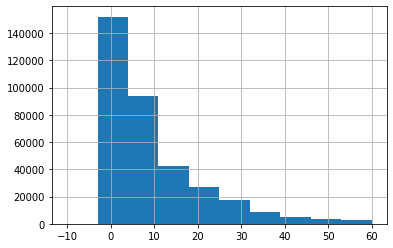

In [42]:
visits['session_duration_minunes'].hist(bins=10, range=(-10, 60))

<font color='blue'> Все верно. </font>

### - Как часто люди возвращаются?

In [43]:
first_visit = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']
first_visit.head()

,uid,first_visit
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [44]:
visits = visits.merge(first_visit)
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name,session_duration_minunes,first_visit
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,12,2017,51,Wednesday,December,18.00,2017-12-20 17:20:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,2,2018,8,Monday,February,28.00,2018-02-19 16:53:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,7,2017,26,Saturday,July,0.00,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,2018,20,Sunday,May,24.00,2018-03-09 20:05:00
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,9,3,2018,10,Friday,March,28.00,2018-03-09 20:05:00


In [45]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

In [46]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name,session_duration_minunes,first_visit,first_visit_month,visit_month
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,12,2017,51,Wednesday,December,18.00,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,2,2018,8,Monday,February,28.00,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,7,2017,26,Saturday,July,0.00,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,2018,20,Sunday,May,24.00,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,9,3,2018,10,Friday,March,28.00,2018-03-09 20:05:00,2018-03-01,2018-03-01


In [47]:
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

In [48]:
cohort_visits = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
f_uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'uid']]
f_uid.columns = ['first_visit_month', 'f_uid']
f_uid.head()

,first_visit_month,f_uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [49]:
cohort_visits = cohort_visits.merge(f_uid)
cohort_visits['retention'] = cohort_visits['uid'] / cohort_visits['f_uid']
visits_retention_pivot = cohort_visits.pivot_table(index = 'first_visit_month', 
                                                   columns = 'lifetime', values = 'retention', aggfunc = 'sum')

visits_retention_pivot.mean() * 100

lifetime
0    100.00
1      6.52
2      4.63
3      4.28
4      4.06
5      3.94
6      3.70
7      3.75
8      3.55
9      3.52
10     3.41
11     4.50
dtype: float64

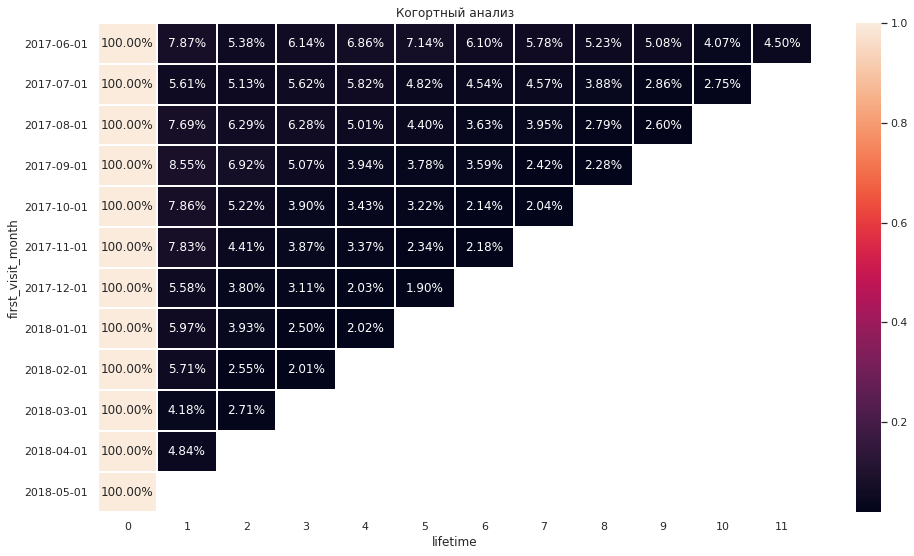

In [50]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('Когортный анализ')
ax = sns.heatmap(visits_retention_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white')
ax.set_yticklabels(visits_retention_pivot.index.date)
plt.show()

#### Как люди возвращаются:
    - в основном (90-95%) люди отваливаются, в целом бизнес "одноразовый", 
    мало кто будет ходить каждый месяц стабильно на протяжении года
    - остальные отваливаются уже медленнее, возможно, это связано с графиками премьер,
    иногда премьеры выходят одна за другой, чтобы успеть собрать кассу.
    
<font color='blue'> Правильно. </font>

<a name="stage_2_2"></a>
## Продажи
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)


[К оглавлению](#table_of_contents)

### - Когда люди начинают покупать?

In [51]:
orders.head()

,uid,revenue,purchase_ts
0,10329302124590727494,17.00,2017-06-01 00:10:00
1,11627257723692907447,0.55,2017-06-01 00:25:00
2,17903680561304213844,0.37,2017-06-01 00:27:00
3,16109239769442553005,0.55,2017-06-01 00:29:00
4,14200605875248379450,0.37,2017-06-01 07:58:00


In [52]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name,session_duration_minunes,first_visit,first_visit_month,visit_month,lifetime
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,12,2017,51,Wednesday,December,18.00,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,2,2018,8,Monday,February,28.00,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,7,2017,26,Saturday,July,0.00,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,2018,20,Sunday,May,24.00,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,9,3,2018,10,Friday,March,28.00,2018-03-09 20:05:00,2018-03-01,2018-03-01,0


In [53]:
first_visit = visits.groupby('uid').agg({'start_ts':'min'})\
                .rename(columns={'start_ts':'first_visit_date'})\
                .reset_index()

In [54]:
first_order = orders.groupby('uid').agg({'purchase_ts':'min'})\
                .rename(columns={'purchase_ts':'first_purchase_date'})\
                .reset_index()

In [55]:
buying_time = first_visit.merge(first_order, on='uid', how='inner')

In [56]:
buying_time.head()

,uid,first_visit_date,first_purchase_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [57]:
buying_time['buying_time'] = (buying_time['first_purchase_date'] - buying_time['first_visit_date']).dt.seconds / 60

In [58]:
buying_time.head()

,uid,first_visit_date,first_purchase_date,buying_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,"1,382.00"
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,"1,184.00"
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.00


In [59]:
buying_time['buying_time'].mode()

0   1.00
dtype: float64

In [60]:
buying_time['buying_time'].describe()

count   36,523.00
mean       249.16
std        429.74
min          0.00
25%          4.00
50%         16.00
75%        252.00
max      1,439.00
Name: buying_time, dtype: float64

In [61]:
buying_time[buying_time['buying_time'] == 0].count()

uid                    2467
first_visit_date       2467
first_purchase_date    2467
buying_time            2467
dtype: int64

Text(0.5, 1.0, 'Время в минутах от первого визита до покупки')

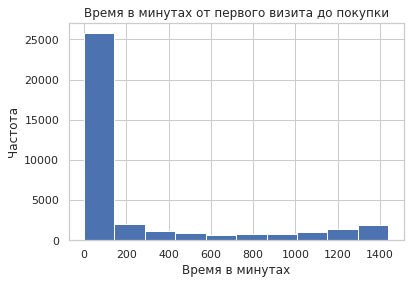

In [62]:
ax = buying_time['buying_time'].hist()
ax.set_xlabel('Время в минутах')
ax.set_ylabel('Частота')
ax.set_title('Время в минутах от первого визита до покупки')

#### Когда люди начинают покупать:
    - в среднем через 249 минут
    - в медианном через 16 минут
    - в модном через 1 минуту
    
В общем, покупают чаще сразу, выбор, видимо, "теплый".

<font color='blue'> Отлично, все верно. </font>

### - Сколько раз покупают за период?

In [63]:
orders_and_visits = orders.merge(first_visit)

In [64]:
orders_and_visits.head()

,uid,revenue,purchase_ts,first_visit_date
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01 00:09:00
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01 00:14:00
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01 00:25:00
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01 00:14:00
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01 07:31:00


In [65]:
orders_and_visits['purchase_date'] = orders_and_visits['purchase_ts'].dt.date
orders_and_visits['purchases_week'] = orders_and_visits['purchase_ts'].dt.week
orders_and_visits['purchase_month'] = orders_and_visits['purchase_ts'].dt.month

In [66]:
purchases_per_day = orders_and_visits.groupby('purchase_date')['uid'].count()
purchases_per_week = orders_and_visits.groupby(['purchases_week'])['uid'].count()
purchases_per_month = orders_and_visits.groupby(['purchase_month'])['uid'].count()

In [67]:
orders_count = pd.DataFrame()

In [68]:
orders_count['per_day'] = purchases_per_day.describe()

In [69]:
orders_count['per_week'] = purchases_per_week.describe()

In [70]:
orders_count['per_month'] = purchases_per_month.describe()

#### Вот столько покупают за день, месяц и год:

In [71]:
orders_count.head(8)

,per_day,per_week,per_month
count,364.00,52.00,12.00
mean,138.50,969.52,"4,201.25"
std,76.86,397.63,"1,511.86"
min,1.00,314.00,"1,807.00"
25%,82.75,658.50,"3,045.50"
50%,136.00,997.50,"4,533.50"
75%,177.00,"1,270.50","5,409.25"
max,814.00,"1,894.00","6,218.00"


<font color='blue'> Хорошо, здесь стоит текстом добавить. </font>

### - Какой средний чек?

In [72]:
orders_and_visits['revenue'].describe()

count   50,415.00
mean         5.00
std         21.82
min          0.00
25%          1.22
50%          2.50
75%          4.89
max      2,633.28
Name: revenue, dtype: float64

In [73]:
orders_and_visits['revenue'].mode()

0   1.83
dtype: float64

In [74]:
orders_and_visits.head()

,uid,revenue,purchase_ts,first_visit_date,purchase_date,purchases_week,purchase_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,22,6
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,22,6
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,22,6
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,22,6
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,22,6


In [75]:
mean_purchase_by_month = orders_and_visits.groupby('purchase_month').agg({'revenue': 'mean'})

In [76]:
month_lst = ['June', 'July', 'August', 'September', 'October', 'November', \
             'December', 'January', 'February', 'March', 'April', 'May']

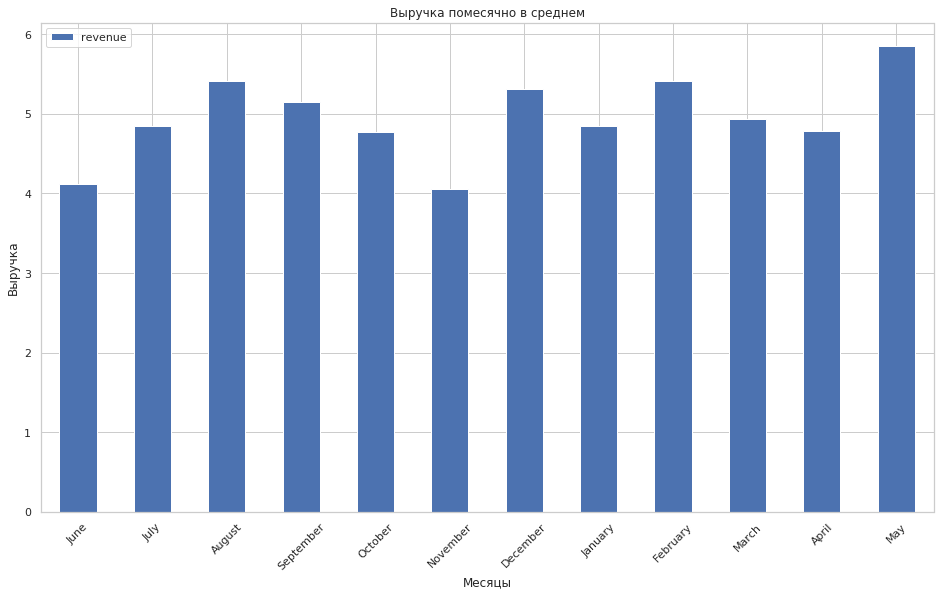

In [77]:
ax = mean_purchase_by_month.plot(kind='bar', figsize=(16, 9))
ax.set_xticklabels(month_lst, rotation=45)
plt.title('Выручка помесячно в среднем')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Выручка')
plt.show()

#### Средний чек бывает от 4 до 6, мода 1.8.

<font color='blue'> все верно. </font>

### - Сколько денег приносят? (LTV)

In [78]:
orders = orders.set_index('uid')
orders['buy_month'] = orders['purchase_ts'].astype('datetime64[M]')

In [79]:
costs_for_ltv = costs.rename(columns={'date':'acquisition_date'})

In [80]:
users = visits.groupby('uid').agg({'start_ts':'min'}).rename(columns={'start_ts':'acquisition_dt'})

In [81]:
users = visits.set_index('uid').join(users)

In [82]:
users = users.query('start_ts == acquisition_dt')

In [83]:
users = users.query('start_ts == acquisition_dt')[['acquisition_dt','device','source_id']]

In [84]:
users['acquisition_date'] = users['acquisition_dt'].dt.date
users['acquisition_date'] = pd.to_datetime(users['acquisition_date'])

In [85]:
users['acquisition_month'] = users['acquisition_dt'].astype('datetime64[M]')

In [86]:
costs_for_ltv = costs_for_ltv.set_index(['source_id','acquisition_date'])

In [87]:
users = users.reset_index().set_index(['source_id','acquisition_date'])

In [88]:
users = users.join(costs_for_ltv, how='left')

In [89]:
cac = (users.reset_index().groupby(['source_id','acquisition_date']).agg({'device':'count','costs':'max'})\
      .rename(columns={'device':'users'}))

In [90]:
cac['acquisition_cost'] = cac['costs'] / cac['users']

In [91]:
users = users.join(cac[['acquisition_cost','users']], how='left').reset_index()

In [92]:
ltv = orders.join(users.set_index('uid'), how='left')[['acquisition_month','buy_month','revenue']]

In [93]:
# Месяц округляем
ltv['age_month'] = ((ltv['buy_month']-ltv['acquisition_month']) / np.timedelta64(1,'M')).round().astype('int')

In [94]:
ltv = ltv.groupby(['acquisition_month','age_month']).agg({'revenue':'sum'})

In [95]:
ltv = ltv.pivot_table(index='acquisition_month', columns='age_month', values='revenue', aggfunc='sum')

In [96]:
# Накопим сумму по каждой когорте
ltv = ltv.cumsum(axis=1)

In [97]:
ltv

age_month,0,1,2,3,4,5,6,7,8,9,10,11
acquisition_month,,,,,,,,,,,,
2017-06-01,"9,557.49","12,222.07","13,686.76","17,568.85","21,509.44","24,333.92","27,823.87","30,094.68","32,412.59","35,894.23","38,098.24","40,026.05"
2017-07-01,"9,874.89","10,934.17","12,043.07","13,026.03","13,873.02","14,671.10","15,259.10","16,029.40","16,753.92","17,344.95","17,812.11",nan
2017-08-01,"6,234.81","7,232.13","8,233.48","9,179.69","9,989.73","10,522.63","11,009.28","12,255.51","13,086.15","13,461.87",nan,nan
2017-09-01,"12,357.20","16,057.68","18,168.31","28,607.24","29,895.72","31,805.77","32,772.61","33,263.99","33,682.56",nan,nan,nan
2017-10-01,"18,362.32","22,172.15","23,499.17","24,557.22","25,600.69","26,622.88","27,201.79","27,857.69",nan,nan,nan,nan
2017-11-01,"16,531.79","19,199.37","20,542.22","21,911.75","23,020.49","23,728.12","24,426.72",nan,nan,nan,nan,nan
2017-12-01,"16,857.00","18,596.03","22,794.33","27,918.15","29,375.72","31,157.85",nan,nan,nan,nan,nan,nan
2018-01-01,"10,597.01","12,548.71","13,713.47","14,019.35","14,546.82",nan,nan,nan,nan,nan,nan,nan
2018-02-01,"11,512.63","13,497.09","14,160.28","15,061.29",nan,nan,nan,nan,nan,nan,nan,nan


In [98]:
cohorts = (users.groupby('acquisition_month').agg({'device':'count','acquisition_cost':'sum'})
                                             .rename(columns={'device':'cohort_size'}))

In [99]:
cohorts.head()

,cohort_size,acquisition_cost
acquisition_month,,
2017-06-01,13259,"18,015.00"
2017-07-01,13140,"18,230.81"
2017-08-01,10181,"14,789.17"
2017-09-01,16704,"24,360.36"
2017-10-01,25977,"36,322.88"


In [100]:
ltv = cohorts[['cohort_size']].join(ltv)

In [101]:
ltv = ltv.div(ltv['cohort_size'], axis=0).drop(columns = ['cohort_size'])

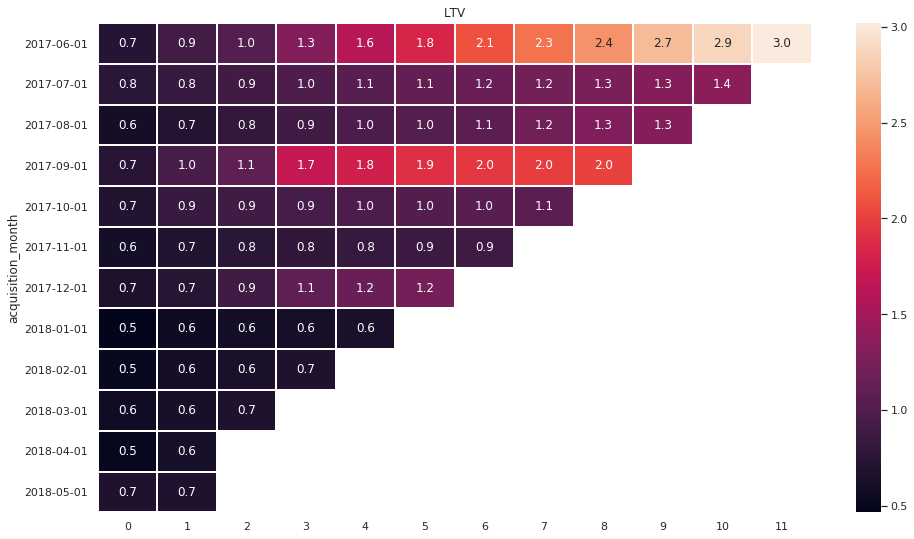

In [102]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (16, 9))
plt.title('LTV')
ax = sns.heatmap(ltv, annot=True, fmt='.1f', linewidths=1, linecolor='white')
ax.set_yticklabels(ltv.index.date)
plt.show()

<a name="stage_2_3"></a>
## Маркетинг
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?


[К оглавлению](#table_of_contents)

### - Сколько денег потратили? Всего / на каждый источник / по времени

#### Всего потратили:

In [103]:
costs['costs'].sum()

329131.62

In [104]:
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()

In [105]:
costs_by_source['in_percents'] = costs_by_source['costs'] / 329131.62 * 100

In [106]:
costs_by_source.sort_values('in_percents', ascending = False)

,source_id,costs,in_percents
2,3,"141,321.63",42.94
3,4,"61,073.60",18.56
4,5,"51,757.10",15.73
1,2,"42,806.04",13.01
0,1,"20,833.27",6.33
6,10,"5,822.49",1.77
5,9,"5,517.49",1.68


In [107]:
costs.head()

,source_id,costs,date
0,1,75.20,2017-06-01
1,1,62.25,2017-06-02
2,1,36.53,2017-06-03
3,1,55.00,2017-06-04
4,1,57.08,2017-06-05


In [108]:
costs['costs_month'] = costs['date'].astype('datetime64[M]').dt.date

In [109]:
costs_by_month = costs.groupby('costs_month')['costs'].sum().reset_index()
costs_by_month

,costs_month,costs
0,2017-06-01,"18,015.00"
1,2017-07-01,"18,240.59"
2,2017-08-01,"14,790.54"
3,2017-09-01,"24,368.91"
4,2017-10-01,"36,322.88"
5,2017-11-01,"37,907.88"
6,2017-12-01,"38,315.35"
7,2018-01-01,"33,518.52"
8,2018-02-01,"32,723.03"
9,2018-03-01,"30,415.27"


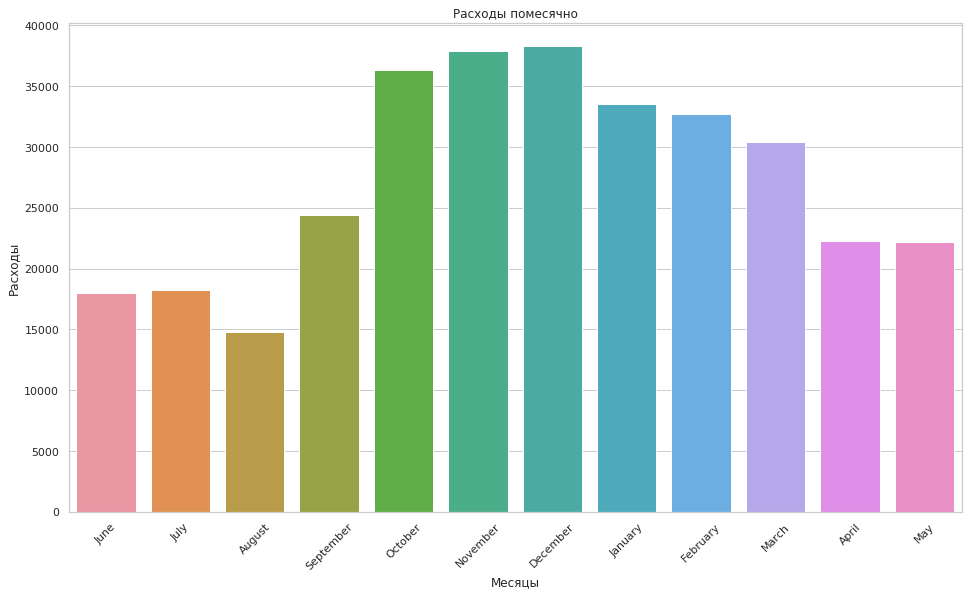

In [110]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="costs_month", y="costs", data=costs_by_month)
ax.set_xticklabels(month_lst, rotation=45)
plt.title('Расходы помесячно')
ax.set_xlabel('Месяцы')
ax.set_ylabel('Расходы')
plt.show()

#### Больше всего потратили денег в октябре, ноябре и сентрябре 2017 года.

### - Сколько стоило привлечение одного покупателя из каждого источника?

In [111]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source.reset_index()

,source_id,costs
0,1,"20,833.27"
1,2,"42,806.04"
2,3,"141,321.63"
3,4,"61,073.60"
4,5,"51,757.10"
5,9,"5,517.49"
6,10,"5,822.49"


In [112]:
visits_by_source = visits.query('start_ts == first_visit')
customers_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})\
                        .rename(columns={'uid':'customers'})

In [113]:
customers_by_source.reset_index()

,source_id,customers
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [114]:
cac = customers_by_source.join(costs_by_source).reset_index()
cac

,source_id,customers,costs
0,1,2899,"20,833.27"
1,2,3506,"42,806.04"
2,3,10473,"141,321.63"
3,4,10296,"61,073.60"
4,5,6931,"51,757.10"
5,7,1,nan
6,9,1088,"5,517.49"
7,10,1329,"5,822.49"


In [115]:
cac = cac.fillna(0)

In [116]:
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

,source_id,customers,costs,cac
2,3,10473,"141,321.63",13.49
1,2,3506,"42,806.04",12.21
4,5,6931,"51,757.10",7.47
0,1,2899,"20,833.27",7.19
3,4,10296,"61,073.60",5.93
6,9,1088,"5,517.49",5.07
7,10,1329,"5,822.49",4.38
5,7,1,0.00,0.00


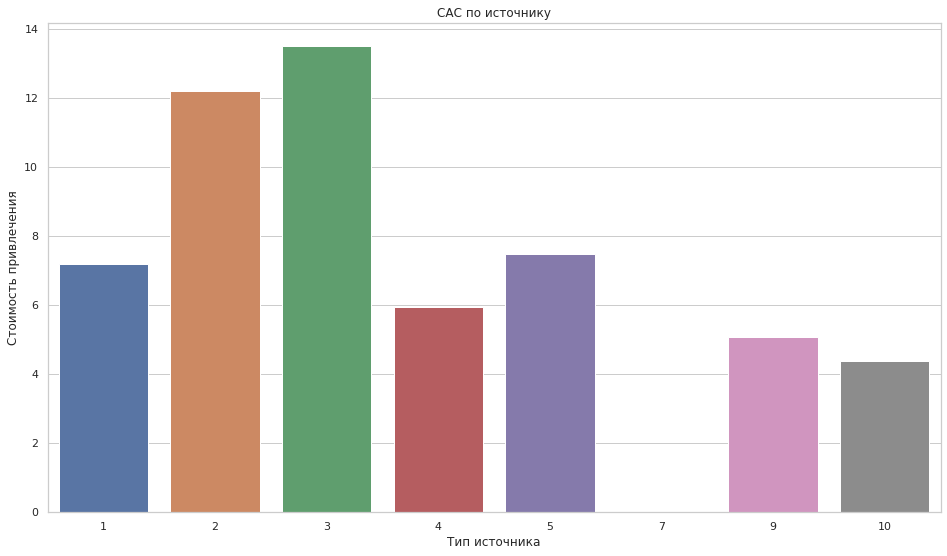

In [117]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="cac", data=cac)
plt.title('CAC по источнику')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Стоимость привлечения')
plt.show()

<font color='blue'> Хорошо, все верно. </font>

### - На сколько окупились расходы? (ROI)

In [118]:
costs_by_source.reset_index()

,source_id,costs
0,1,"20,833.27"
1,2,"42,806.04"
2,3,"141,321.63"
3,4,"61,073.60"
4,5,"51,757.10"
5,9,"5,517.49"
6,10,"5,822.49"


In [119]:
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
revenue_by_source.reset_index()

,source_id,revenue
0,1,"31,090.55"
1,2,"46,923.61"
2,3,"54,511.24"
3,4,"56,696.83"
4,5,"52,624.02"
5,7,1.22
6,9,"5,759.40"
7,10,"4,450.33"


In [120]:
roi = revenue_by_source.join(costs_by_source)
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']

In [121]:
roi.sort_values('roi', ascending = False)

,revenue,costs,roi
source_id,,,
1,"31,090.55","20,833.27",0.49
2,"46,923.61","42,806.04",0.10
9,"5,759.40","5,517.49",0.04
5,"52,624.02","51,757.10",0.02
4,"56,696.83","61,073.60",-0.07
10,"4,450.33","5,822.49",-0.24
3,"54,511.24","141,321.63",-0.61
7,1.22,nan,nan


#### У части источников был минус, у части источников был плюс. Лучший по окупаемости источник №1. 

In [122]:
revenue_by_source_and_device = (orders.merge(visits_by_source, on='uid', how='inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue':'sum'})

In [123]:
revenue_by_source_and_device = revenue_by_source_and_device.reset_index()

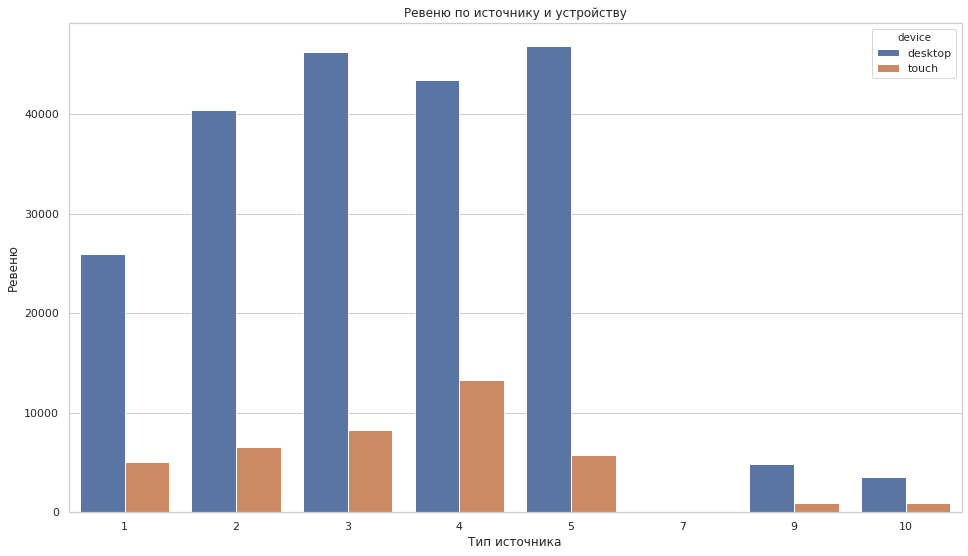

In [124]:
plt.figure(figsize = (16, 9))
ax = sns.barplot(x="source_id", y="revenue", hue="device", data=revenue_by_source_and_device)
plt.title('Ревеню по источнику и устройству')
ax.set_xlabel('Тип источника')
ax.set_ylabel('Ревеню')
plt.show()

<a name="stage_3"></a>
# Выводы:

- В декабре есть пичок, но какой-либо выраженной сезонности особо не видно.
- Есть странный источник номер 7, его нужно детальнее проанализировать.
- Лучшие источники 1, 2, 3, 5.
- Ориентируемся на ROI, CAC, выручку.
- Клиенты в бизнесе одноразовые.
- Тач выглядит хуже, чем десктоп.


<font color='blue'> Все верно. </font>

[К оглавлению](#table_of_contents)

<font color='blue'> проект выполнен отлично, молодец. </font>